# What is Corona Virus(COVID-19) its cause and symptoms?

COVID-19, short for "Coronavirus Disease 2019," is an infectious disease caused by the novel coronavirus SARS-CoV-2. It was first identified in December 2019 in the city of Wuhan, Hubei province, China. The virus quickly spread globally, leading to a pandemic as declared by the World Health Organization (WHO) on March 11, 2020.

**Causes**:
SARS-CoV-2 is a member of the coronavirus family, which includes viruses that can cause illnesses ranging from the common cold to more severe respiratory diseases like Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The exact origin of SARS-CoV-2 is still under investigation, but it is believed to have originated in bats and possibly passed through an intermediate animal host before infecting humans.

**Symptoms**:
COVID-19 symptoms can range from mild to severe and may appear 2-14 days after exposure to the virus.

Common symptoms include:

  Fever or chills,
  Cough,
  Shortness of breath or difficulty breathing,
  Fatigue,
  Muscle or body aches,
  Headache,
  Loss of taste or smell,
  Sore throat,
  Congestion or runny nose,
  Nausea or vomiting,
  Diarrhea.




## Introduction:


**Introduction:**

The COVID-19 pandemic, caused by the novel coronavirus, has prompted an urgent need for accurate prediction methods. Machine learning, a facet of artificial intelligence, offers a promising avenue to predict the course of the disease. By analyzing intricate data patterns, machine learning can assist in forecasting the spread of COVID-19, identifying potential outbreak areas, and aiding decision-making for effective interventions.

**Objective:**

This study aims to employ machine learning techniques to predict COVID-19 trends. By amalgamating diverse datasets encompassing epidemiological, clinical, and socio-economic factors, we intend to construct robust prediction models. The objective of this project is to develop a machine learning model that can predict diseases with high accuracy using medical data such as demographic information, lab test results, and lifestyle factors.

### Data summary

The current dataset has been downloaded from a government website and contains around 2,78,848 individuals who have gone through the RT-PCR test. Data set contains 11 columns, including 8 features suspected to play an important role in the prediction of COVID19 outcome. Outcome variable is covid result test positive or negative.

#### Column descryption

This dataset has columns like:


**A. Basic information:**

1. ID (Individual ID)

2. Sex (male/female).

3. Age ≥60 above years (true/false)

4. Test date (date when tested for COVID)


**B. Symptoms:**

5. Cough (true/false).

6. Fever (true/false).

7. Sore throat (true/false).

8. Shortness of breath (true/false).

9. Headache (true/false).


**C. Other information:**

10. Known contact with an individual confirmed to have COVID-19 (true/false).


**D. Covid report:**

11. Corona positive or negative


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
Covid_test = pd.read_csv('corona_tested_006.csv')
Covid_test

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other


### Issues With the Data

In the given data, there are several issues that need to be addressed before it can be used for analysis and modeling:

-Data Consistency: The data for different symptoms (Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, Headache, Age_60_above) are recorded in different ways. This needs to be standardized to ensure consistency in the data.

 - Missing Values: There are missing values in some columns represented as NAN. This needs to be handled to ensure that the data     is complete and ready for analysis.

 - Imbalanced Dataset: The outcome data is imbalanced, with more data points for one class than the other. This can result in      biased predictions and needs to be addressed by either oversampling the minority class or undersampling the majority class.

 - Categorical Data: Some of the data is categorical, which needs to be encoded for use in machine learning algorithms.

These issues will need to be addressed before the data can be used for analysis and modeling.

#### Basic Exploration

In [3]:
Covid_test.shape

(278848, 11)

In [4]:
Covid_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [5]:
# column names
Covid_test.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [6]:
#checking for duplicates
Covid_test.duplicated().sum()

0

# Let's Find out distinct number of Corona symptoms

In [7]:
# let's findout the Distinct number of Corona symptoms present in dataset

print('Distinct Number of Cough symptoms',Covid_test['Cough_symptoms'].unique())
print('Distinct Number of Fever symptoms',Covid_test['Fever'].unique())
print('Distinct Number of Sore_throat symptoms',Covid_test['Sore_throat'].unique())
print('Distinct Number of Shortness_of_breath symptoms',Covid_test['Shortness_of_breath'].unique())
print('Distinct Number of Headache symptoms',Covid_test['Headache'].unique())
print('Distinct Number of Corona symptoms',Covid_test['Corona'].unique())
print('Distinct Number of Age_60_above symptoms',Covid_test['Age_60_above'].unique())
print('Distinct Number of Sex symptoms',Covid_test['Sex'].unique())
print('Distinct Number of Known_contact symptoms',Covid_test['Known_contact'].unique())

Distinct Number of Cough symptoms ['TRUE' 'FALSE' 'None' False True]
Distinct Number of Fever symptoms ['FALSE' 'TRUE' 'None' False True]
Distinct Number of Sore_throat symptoms ['TRUE' 'FALSE' 'None' False True]
Distinct Number of Shortness_of_breath symptoms ['FALSE' 'TRUE' 'None' False True]
Distinct Number of Headache symptoms ['FALSE' 'TRUE' 'None' False True]
Distinct Number of Corona symptoms ['negative' 'positive' 'other']
Distinct Number of Age_60_above symptoms ['None' 'No' 'Yes']
Distinct Number of Sex symptoms ['None' 'male' 'female']
Distinct Number of Known_contact symptoms ['Abroad' 'Contact with confirmed' 'Other']


The challenge with this dataset is that the observations are quite messy and there are some missing values present. In order to clean the dataset, I need to change the "None" values to NaN and clarify the "false" and "False" values as Python treats them differently.

In [8]:
# Now let's clean our data set

Covid_test['Cough_symptoms'] = Covid_test['Cough_symptoms'].replace({'None': None, 'TRUE': True, 'FALSE': False})
Covid_test['Fever'] = Covid_test['Fever'].replace({'None': None, 'TRUE': True, 'FALSE': False})
Covid_test['Sore_throat'] = Covid_test['Sore_throat'].replace({'None': None, 'TRUE': True, 'FALSE': False})
Covid_test['Shortness_of_breath'] = Covid_test['Shortness_of_breath'].replace({'None': None, 'TRUE': True, 'FALSE': False})
Covid_test['Headache'] = Covid_test['Headache'].replace({'None': None, 'TRUE': True, 'FALSE': False})
Covid_test['Age_60_above'] = Covid_test['Age_60_above'].replace({'None': None})
Covid_test['Sex'] = Covid_test['Sex'].replace({'None': None})

In [9]:
# Now the dataset are clean
Covid_test.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              2
Fever                       2
Sore_throat                 2
Shortness_of_breath         2
Headache                    2
Corona                      3
Age_60_above                2
Sex                         2
Known_contact               3
dtype: int64

 ## Now to calculate Missing Value and also it's  Percentage

In [10]:
#Checking for missing values
Covid_test.isnull().sum().sort_values(ascending=False)

Age_60_above           127320
Sex                     19563
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Ind_ID                      0
Test_date                   0
Corona                      0
Known_contact               0
dtype: int64

In [11]:
#Checking for missing values in terms of percentage in descending order

missing_percentage = (Covid_test.isnull().sum() / len(Covid_test)) * 100
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
missing_percentage_sorted

Age_60_above           45.659284
Sex                     7.015650
Cough_symptoms          0.090372
Fever                   0.090372
Sore_throat             0.000359
Shortness_of_breath     0.000359
Headache                0.000359
Ind_ID                  0.000000
Test_date               0.000000
Corona                  0.000000
Known_contact           0.000000
dtype: float64

# IMPUTATION

In [12]:
# Since from the table covid_test in that the column Age_60_above has highest missing value of greater than 45 percentage so its better to drop that column
Covid_test.drop('Age_60_above', axis=1, inplace=True)

In [13]:
# since the columns that are having missing value are categoircal column so the best method is to go for Mode Imputation
columns_to_impute = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Sex']

for column in columns_to_impute:
    Covid_test[column] = Covid_test[column].fillna(Covid_test[column].mode()[0])

In [14]:
Covid_test.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Sex                    0
Known_contact          0
dtype: int64

# Exploratory Data Analysis

In [ ]:
Covid_test['Corona'].value_counts()


negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64

Insights:

We have three values in our Outcome Variable column and they are "negative", "positive" and "other"

As per our business requirement , we need to build a model which can predict whether a person is covid positive or negative.

As the values with "other" is less than 1% of total records and we don't need to train our model for "other" value

We can drop it.

In [19]:
Covid_test = Covid_test[Covid_test.Corona != "other"]
Covid_test

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,female,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,female,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,female,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,female,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,female,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,male,Other


In [20]:
Covid_test['Corona'].value_counts()

negative    260227
positive     14729
Name: Corona, dtype: int64

## Univariate Analysis

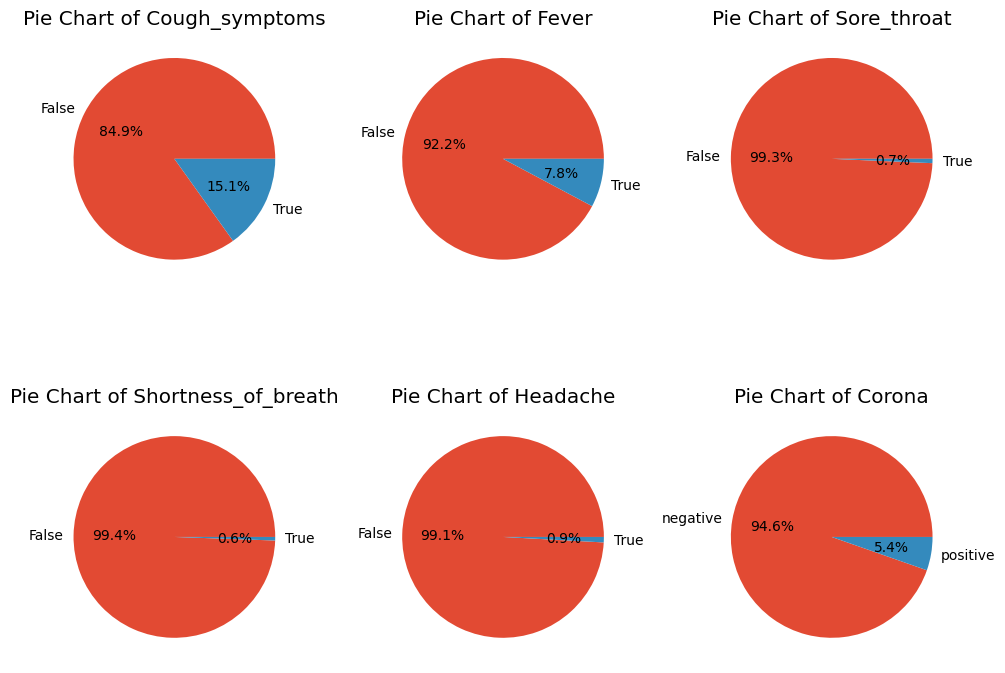

In [88]:
fig = plt.figure(figsize=(10,8))

# Plot Pie Chart for 'Cough_symptoms'
value_counts_cough = Covid_test['Cough_symptoms'].value_counts()
plt.subplot(2,3,1)
plt.pie(value_counts_cough,labels=value_counts_cough.index, autopct='%1.1f%%')
plt.title('Pie Chart of Cough_symptoms')
plt.ylabel('')

# Plot Pie Chart for 'Fever'
value_counts_fever = Covid_test['Fever'].value_counts()
plt.subplot(2,3,2)
plt.pie(value_counts_fever,labels=value_counts_fever.index, autopct='%1.1f%%')
plt.title('Pie Chart of Fever')
plt.ylabel('')

# Plot Pie Chart for 'Sore_throat'
value_counts_sore_throat = Covid_test['Sore_throat'].value_counts()
plt.subplot(2,3,3)
plt.pie(value_counts_sore_throat, labels=value_counts_sore_throat.index, autopct='%1.1f%%')
plt.title('Pie Chart of Sore_throat')
plt.ylabel('')

# Plot Pie Chart for 'Shortness_of_breath'
Shortness_of_breath = Covid_test['Shortness_of_breath'].value_counts()
plt.subplot(2,3,4)
plt.pie(Shortness_of_breath, labels=Shortness_of_breath.index, autopct='%1.1f%%')
plt.title('Pie Chart of Shortness_of_breath')
plt.ylabel('')

# Plot Pie Chart for 'Headache'
Headache = Covid_test['Headache'].value_counts()
plt.subplot(2,3,5)
plt.pie(Headache, labels=Headache.index, autopct='%1.1f%%')
plt.title('Pie Chart of Headache')
plt.ylabel('')

# Plot Pie Chart for 'Corona'
Corona = Covid_test['Corona'].value_counts()
plt.subplot(2,3,6)
plt.pie(Corona, labels=Corona.index, autopct='%1.1f%%')
plt.title('Pie Chart of Corona')
plt.ylabel('')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

**From the pie chart graph we can see that majority of the symptoms are False**

# Now from the dataset lets findout  what are  the major symptoms which are True Based on their Gender



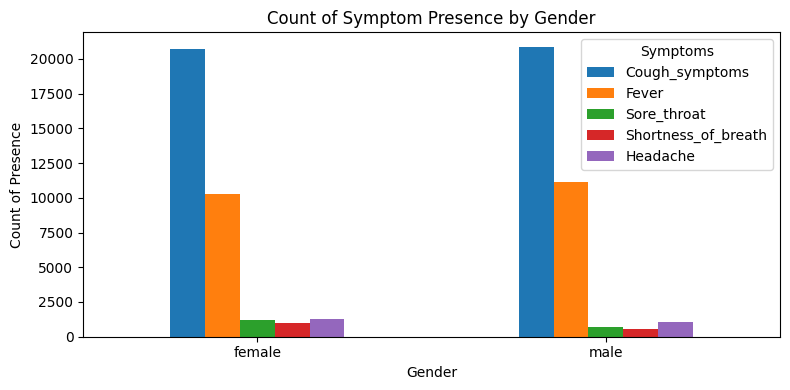

In [22]:
symptom_columns = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']

# Filter data to include only 'True' values in symptom columns
filtered_data = Covid_test[symptom_columns][Covid_test[symptom_columns] == True]

# Group data by 'Sex' and calculate count for symptom columns
grouped = filtered_data.groupby(Covid_test['Sex']).count()

# Plot grouped data
grouped.plot(kind='bar', figsize=(8,4))
plt.title('Count of Symptom Presence by Gender')
plt.ylabel('Count of Presence')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(title='Symptoms')


plt.tight_layout()
plt.show()

**so from the bar char we can see that the symptoms of covid in  both the  gender are same so it implies that the covid 19 is independent of gender**

# Now let's find out the what are the  major symptom cause of the people who are corona positive

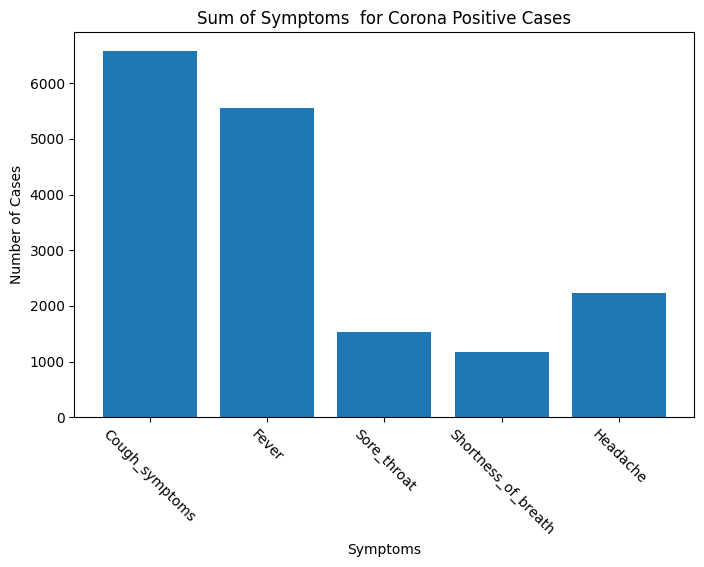

In [23]:
positive_cases = Covid_test[Covid_test['Corona'] =='positive']

# Calculate symptom counts
symptom_counts = positive_cases.iloc[:,2:7].sum()

# Plotting using Matplotlib
plt.figure(figsize=(8,5))
plt.bar(symptom_counts.index, symptom_counts.values)
plt.title("Sum of Symptoms  for Corona Positive Cases")
plt.xlabel("Symptoms")
plt.ylabel("Number of Cases")
plt.xticks(rotation=-45)
plt.show()

**From the graph we can see that major symptoms in covid positive patient is cough fever and headache.**

# Now lets findout what are the major symptoms which are True and how they got corona and through by which type of contact

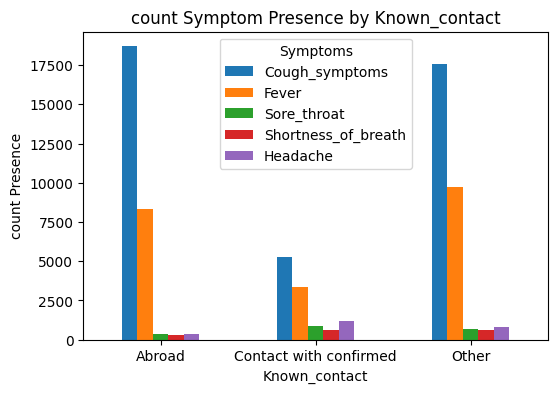

In [24]:
symptom_columns = [ 'Cough_symptoms', 'Fever', 'Sore_throat','Shortness_of_breath', 'Headache']
filtered_data_Know_contact = Covid_test[symptom_columns][Covid_test[symptom_columns] == True]

# Group data by 'Known_contact' and calculate mean for symptom columns
grouped = filtered_data.groupby(Covid_test['Known_contact']).count()

# Plot grouped data
grouped.plot(kind='bar', figsize=(6,4))
plt.title('count Symptom Presence by Known_contact')
plt.ylabel('count Presence')
plt.xlabel('Known_contact')
plt.xticks(rotation=0)
plt.legend(title='Symptoms')
plt.show()

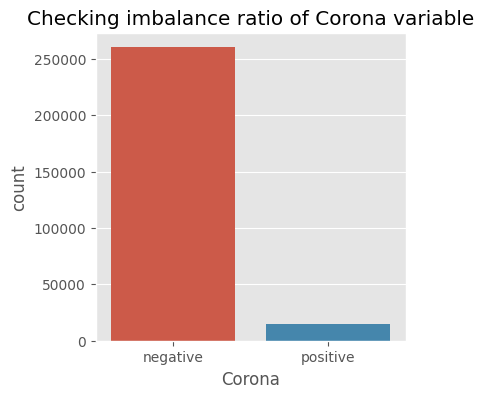

In [25]:
# checking the imbalance using countplot

plt.style.use('ggplot')
plt.figure(figsize = [4,4])

sns.countplot(data=Covid_test, x='Corona')
plt.title("Checking imbalance ratio of Corona variable")
plt.show()

In [26]:
# checking exact Corona Positive to Corona negative ratio
Covid_test[Covid_test.Corona=='negative'].shape[0]/Covid_test[Covid_test.Corona=='positive'].shape[0]

17.667662434652726

This shows that 1 in every 17-18 patients is corona positive.

In [ ]:
# Now let's export the cleaned dataset for analysis of dataset in Mysql project in excel format
Covid_test.to_excel("Final_cleaned_corona_test_data.xlsx")

## Feature Engineering and Selection

In [46]:
Covid_Test1= Covid_test.copy(deep=True)
Covid_Test1

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,female,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,female,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,female,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,female,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,female,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,male,Other


#### Dealing with Categorical Data

In [47]:
#label encoding on covid table column
# Import label encoder
from sklearn.preprocessing import LabelEncoder

In [48]:
# Perfoming LabelEncoding
Covid_Test1[['Cough_symptoms','Fever','Sore_throat','Corona','Shortness_of_breath','Headache', 'Sex' , 'Known_contact']] =Covid_Test1[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Corona','Headache','Sex' , 'Known_contact']].apply(LabelEncoder().fit_transform)

In [49]:
Covid_Test1.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact
0,1,11-03-2020,1,0,1,0,0,0,0,0
1,2,11-03-2020,0,1,0,1,0,0,0,0
2,3,11-03-2020,0,1,0,1,0,0,0,0
3,4,11-03-2020,1,0,0,0,0,0,0,0
4,5,11-03-2020,1,0,0,0,0,0,0,1


In [50]:
# 'Cough_symptoms' (TRUE = 1 , FALSE = 0)
# 'FEVER' (TRUE = 1 , FALSE = 0)
# 'Sore_throat' (TRUE = 1 , FALSE = 0)
# 'Shortness_of_breath' (TRUE = 1 , FALSE = 0)
# 'Headache' (TRUE = 1 , FALSE = 0)
# Corona (Positive =1 , Negative = 0)
# Sex (Unknown=0, Female=1, Male=2)
# Known_contact (Abroad=0, Contact with confirmed = 1, other = 2)

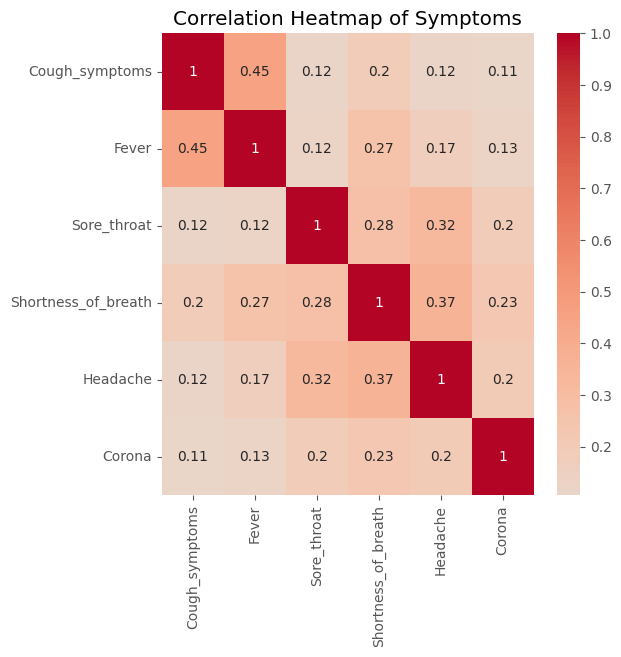

In [51]:
# Select only symptom-related columns for correlation analysis
symptom_columns = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache','Corona']
Covid_test_corr = Covid_Test1[symptom_columns]

# Calculate correlation matrix
correlation_matrix = Covid_test_corr.corr()

# Plot the correlation matrix
plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Symptoms')
plt.show()

Insights:

Almost all the attributes are moderately corelated with each other but none is highly corelated.

In [52]:
# First Import variance_inflation_factor (VIF) from statsmodels

from statsmodels.stats.outliers_influence import variance_inflation_factor
data = Covid_Test1[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Sex','Known_contact']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]

vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)
print(vif_data_sorted)

               feature       VIF
0                  Sex  1.777738
1        Known_contact  1.697056
2       Cough_symptoms  1.435742
3                Fever  1.428048
4  Shortness_of_breath  1.323632
5             Headache  1.247941
6          Sore_throat  1.166758


Insights

The default VIF cutoff value is 5, only variables with a VIF less than 5 will be included in the model.

VIF <= 5 is considered as considerable collinearity

All the VIF value is less than 5. We can go with all the features

In [53]:
Covid_Test1['Test_date'] = pd.to_datetime(Covid_Test1["Test_date"] , format = '%d-%m-%Y')

In [54]:
# Breaking the data according to the date
# Set the breakpoint date
break_date = '2020-04-16'
# Split data based on date ranges
df_train  = Covid_Test1[Covid_Test1['Test_date'] <= break_date]
df_test   = Covid_Test1[Covid_Test1['Test_date'] > break_date]

In [55]:
# Data from 11th march 2020 to 15th april 2020
df_train.tail()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact
172322,172323,2020-04-16,0,0,0,0,0,0,1,2
172323,172324,2020-04-16,0,0,0,0,0,0,0,2
172324,172325,2020-04-16,0,0,0,0,0,0,0,2
172325,172326,2020-04-16,0,0,0,0,0,0,1,2
172326,172327,2020-04-16,0,0,0,0,0,0,0,2


In [56]:
# Data greater than 16th april 2020
df_test.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact
172327,172328,2020-04-17,0,0,0,0,0,0,1,2
172328,172329,2020-04-17,0,0,0,0,0,0,0,2
172329,172330,2020-04-17,0,0,0,0,0,0,0,2
172330,172331,2020-04-17,0,0,0,0,0,0,1,2
172331,172332,2020-04-17,0,0,0,0,0,0,1,2


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Separating dataset into Training set, Test Set and Validation set


In [59]:
# dropping column Test_date and Outcome variable(Corona) column , and storing it to X_train
X_train = df_train.drop(columns = ['Ind_ID','Test_date','Corona'],axis = 1)

# storing outcome variable in y_train.
y_train = df_train['Corona']

In [60]:
# dropping Test_date column and Outcome variable(Corona) column from df_test and storing it to X_test.
X_test = df_test.drop(columns = ['Ind_ID','Test_date','Corona'],axis=1)

# storing Outcome variable test Set data into y_test.
y_test = df_test['Corona']

In [61]:
# We have to divide X_train , y_train into Training Set and Validation in the ratio 4:1 which means 20%.

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state= 42)

In [62]:
# Training Set
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

# Test Set
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

# Validation Set
print("X_val shape: {}".format(X_val.shape))
print("y val shape: {}".format(y_val.shape))

X_train shape: (135826, 7)
y_train shape: (135826,)
X_test shape: (105173, 7)
y_test shape: (105173,)
X_val shape: (33957, 7)
y val shape: (33957,)


In [63]:
# performing transformation of data.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

#**Machine learning Algorithm**

In [64]:
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [78]:
from sklearn.ensemble import RandomForestClassifier
# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the resampled training data
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print classification report and accuracy score
print("Classification Report RandomForestClassifier:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy)

Classification Report RandomForestClassifier:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98    105156
           1       0.00      0.47      0.00        17

    accuracy                           0.95    105173
   macro avg       0.50      0.71      0.49    105173
weighted avg       1.00      0.95      0.98    105173

Accuracy Score: 0.9527920664048758


In [79]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print classification report and accuracy score
print("Classification Report LogisticRegression:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy)

Classification Report LogisticRegression:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    105156
           1       0.00      0.59      0.00        17

    accuracy                           0.94    105173
   macro avg       0.50      0.77      0.49    105173
weighted avg       1.00      0.94      0.97    105173

Accuracy Score: 0.9435311344166278


In [80]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the resampled training data
dt_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print classification report and accuracy score
print("Classification Report DecisionTreeClassifier:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy)

Classification Report DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98    105156
           1       0.00      0.47      0.00        17

    accuracy                           0.95    105173
   macro avg       0.50      0.71      0.49    105173
weighted avg       1.00      0.95      0.98    105173

Accuracy Score: 0.9527825582611507


In [81]:
from sklearn.svm import SVC

# Initialize SVM model
svm_model = SVC()

# Train the model on the resampled training data
svm_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print classification report and accuracy score
print("Classification Report SVC:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy)


Classification Report SVC:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    105156
           1       0.00      0.53      0.00        17

    accuracy                           0.94    105173
   macro avg       0.50      0.73      0.49    105173
weighted avg       1.00      0.94      0.97    105173

Accuracy Score: 0.9392429615966075


## Conclusion:

Precision measures the percentage of correct positive predictions among all positive predictions. Recall measures the percentage of correct positive predictions among all actual positive instances. F1-score is the harmonic mean of precision and recall.

The evaluation of Four different classification models reveals that the RandomForestClassifier outperforms  LogisticRegression ,support vector machine and DecisionTreeClassifier. With an accuracy of 95.28%, it excels in addressing imbalanced class distribution. While the precision-recall trade-off affects the minority class, the RandomForestClassifier demonstrates commendable potential in identifying instances of the minority class. This makes it the recommended choice for achieving a balance between accuracy, precision, and recall in our classification task.